In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Setting a random seed for repeatability
random.seed(42)


# Initialize the network
G = nx.Graph()

# Number of nodes in the network
num_agents = 1000

# Function to initialize agent properties
def initialize_agent():
    return {
        "openness": round(random.uniform(0, 1), 2),        # Openness to new ideas
        "influenceability": round(random.uniform(0, 1), 2), # Likelihood of adopting others' ideas
        "threshold": round(random.uniform(0.5, 1.5), 2),    # Minimum threshold for sharing
        "anger": round(random.uniform(0, 1), 2),           # Emotional properties
        "disgust": round(random.uniform(0, 1), 2),
        "fear": round(random.uniform(0, 1), 2),
        "happiness": round(random.uniform(0, 1), 2),
        "sadness": round(random.uniform(0, 1), 2),
        "surprise": round(random.uniform(0, 1), 2)
    }

# Add nodes with initialized properties
for i in range(num_agents):
    G.add_node(i, **initialize_agent())

# Display a few nodes and their properties as an example
sample_nodes = {node: G.nodes[node] for node in list(G.nodes)[:5]}
sample_nodes


{0: {'openness': 0.64,
  'influenceability': 0.03,
  'threshold': 0.78,
  'anger': 0.22,
  'disgust': 0.74,
  'fear': 0.68,
  'happiness': 0.89,
  'sadness': 0.09,
  'surprise': 0.42},
 1: {'openness': 0.03,
  'influenceability': 0.22,
  'threshold': 1.01,
  'anger': 0.03,
  'disgust': 0.2,
  'fear': 0.65,
  'happiness': 0.54,
  'sadness': 0.22,
  'surprise': 0.59},
 2: {'openness': 0.81,
  'influenceability': 0.01,
  'threshold': 1.31,
  'anger': 0.7,
  'disgust': 0.34,
  'fear': 0.16,
  'happiness': 0.96,
  'sadness': 0.34,
  'surprise': 0.09},
 3: {'openness': 0.1,
  'influenceability': 0.85,
  'threshold': 1.1,
  'anger': 0.81,
  'disgust': 0.73,
  'fear': 0.54,
  'happiness': 0.97,
  'sadness': 0.38,
  'surprise': 0.55},
 4: {'openness': 0.83,
  'influenceability': 0.62,
  'threshold': 1.36,
  'anger': 0.58,
  'disgust': 0.7,
  'fear': 0.05,
  'happiness': 0.23,
  'sadness': 0.29,
  'surprise': 0.08}}

In [2]:
# Function to initialize an idea with specific properties
def initialize_idea():
    return {
        "persuasiveness": round(random.uniform(0.5, 1.5), 2),      # Baseline strength of the idea
        "anger_alignment": round(random.uniform(0, 1), 2),         # Emotional alignment properties
        "disgust_alignment": round(random.uniform(0, 1), 2),
        "fear_alignment": round(random.uniform(0, 1), 2),
        "happiness_alignment": round(random.uniform(0, 1), 2),
        "sadness_alignment": round(random.uniform(0, 1), 2),
        "surprise_alignment": round(random.uniform(0, 1), 2),
        "novelty": round(random.uniform(0, 1), 2),                 # Novelty factor of the idea
        "relevance_factor": round(random.uniform(0.8, 1.2), 2)     # Multiplier for influenceability and openness
    }

# Initialize an idea and display its properties
idea = initialize_idea()
idea


{'persuasiveness': 1.09,
 'anger_alignment': 0.85,
 'disgust_alignment': 0.29,
 'fear_alignment': 0.15,
 'happiness_alignment': 0.46,
 'sadness_alignment': 0.89,
 'surprise_alignment': 0.09,
 'novelty': 0.72,
 'relevance_factor': 1.15}

In [3]:
# Parameters
initial_fraction = 0.5  # Fraction of total nodes that initially receive the idea
timesteps = 10          # Maximum number of timesteps to simulate

# Initialize the adoption tracking
adopted_nodes = set(random.sample(list(G.nodes()), int(initial_fraction * num_agents)))  # Initial seed nodes

adoption_timeline = []  # List to track adopted nodes at each timestep



# Redefine the spread_idea function
def spread_idea(G, idea, adopted_nodes):
    new_adoptions = set()  # Track new adoptions in this timestep
    for node in adopted_nodes:
        # Check each neighbor
        for neighbor in G.neighbors(node):
            # If the neighbor hasn't adopted yet, check if they adopt the idea
            if neighbor not in adopted_nodes:
                agent = G.nodes[neighbor]
                if should_share_idea(agent, idea):
                    new_adoptions.add(neighbor)  # Neighbor adopts the idea
    
    # Update the adopted nodes with new adoptions
    adopted_nodes.update(new_adoptions)
    return new_adoptions

# Run the simulation with the corrected setup
adoption_timeline = []  # Reset timeline

for t in range(timesteps):
    new_adoptions = spread_idea(G, idea, adopted_nodes)
    adoption_timeline.append(list(new_adoptions))  # Record new adoptions at this timestep
    # Stop if no new adoptions in this timestep
    if not new_adoptions:
        break

# Display the adoption timeline
adoption_timeline


[[]]

In [4]:
# Modify the function to check only a subset of the idea's properties at each node
def should_share_idea_with_subset(agent, idea):
    # Randomly select a subset of the emotional alignments to check
    selected_emotions = random.sample(
        ["anger_alignment", "disgust_alignment", "fear_alignment", 
         "happiness_alignment", "sadness_alignment", "surprise_alignment"], 
        k=3  # Choosing 3 out of the 6 emotional components randomly
    )
    
    # Calculate adjusted persuasiveness score for the agent based on selected idea properties
    emotional_influence = sum(agent[emotion.split('_')[0]] * idea[emotion] for emotion in selected_emotions) / len(selected_emotions)
    
    # Persuasiveness adjusted by agent's influenceability, relevance, and novelty
    adjusted_persuasiveness = (idea["persuasiveness"] * idea["relevance_factor"] *
                               agent["influenceability"] * (1 + idea["novelty"]) * (1 + emotional_influence))
    
    # Agent adopts if adjusted persuasiveness exceeds their threshold for sharing
    return adjusted_persuasiveness >= agent["threshold"]

# Redefine the spread_idea function to use the updated check with a subset
def spread_idea(G, idea, adopted_nodes):
    new_adoptions = set()  # Track new adoptions in this timestep
    for node in adopted_nodes:
        # Check each neighbor
        for neighbor in G.neighbors(node):
            # If the neighbor hasn't adopted yet, check if they adopt the idea
            if neighbor not in adopted_nodes:
                agent = G.nodes[neighbor]
                if should_share_idea_with_subset(agent, idea):
                    new_adoptions.add(neighbor)  # Neighbor adopts the idea
    
    # Update the adopted nodes with new adoptions
    adopted_nodes.update(new_adoptions)
    return new_adoptions

# Run the simulation with the updated logic
adopted_nodes = set(random.sample(list(G.nodes()), int(initial_fraction * num_agents)))  # Initial seed nodes
adoption_timeline = []  # Reset timeline

for t in range(timesteps):
    new_adoptions = spread_idea(G, idea, adopted_nodes)
    adoption_timeline.append(list(new_adoptions))  # Record new adoptions at this timestep
    # Stop if no new adoptions in this timestep
    if not new_adoptions:
        break

# Display the adoption timeline
adoption_timeline


[[]]

In [5]:
# Checking basic properties of the network structure
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / num_nodes  # Average number of connections per node

# Check connectivity information
is_connected = nx.is_connected(G)

# Generate a degree distribution histogram to understand connectivity
degree_distribution = [degree for node, degree in G.degree()]

# Display network properties
network_properties = {
    "Number of nodes": num_nodes,
    "Number of edges": num_edges,
    "Average degree": average_degree,
    "Is connected": is_connected,
    "Degree distribution (sample)": degree_distribution[:10]  # Displaying sample for inspection
}
network_properties


{'Number of nodes': 1000,
 'Number of edges': 0,
 'Average degree': 0.0,
 'Is connected': False,
 'Degree distribution (sample)': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [6]:
# Clearing any existing edges before adding the specified structure
G.clear_edges()

# Helper function to add edges until a node reaches the target degree
def add_edges_to_node(G, node, target_degree):
    while G.degree(node) < target_degree:
        # Select a random node to connect to, ensuring no self-loops or duplicate edges
        target_node = random.choice(list(G.nodes()))
        if target_node != node and not G.has_edge(node, target_node):
            G.add_edge(node, target_node)

# Assign degrees to nodes based on the user's requirements
node_counts = [(5, 6), (10, 5), (15, 4), (20, 3), (50, 2)]
current_node = 0

for count, degree in node_counts:
    for _ in range(count):
        add_edges_to_node(G, current_node, degree)
        current_node += 1

# Display the updated network properties to confirm the degree distribution
degree_distribution = [degree for node, degree in G.degree()]
network_properties = {
    "Number of nodes": G.number_of_nodes(),
    "Number of edges": G.number_of_edges(),
    "Degree distribution (sample)": degree_distribution[:10]  # Displaying sample for inspection
}
network_properties


{'Number of nodes': 1000,
 'Number of edges': 281,
 'Degree distribution (sample)': [8, 6, 6, 6, 6, 5, 7, 5, 5, 5]}

In [7]:

# Run the simulation with the updated logic
adopted_nodes = set(random.sample(list(G.nodes()), int(initial_fraction * num_agents)))  # Initial seed nodes
adoption_timeline = []  # Reset timeline

for t in range(timesteps):
    new_adoptions = spread_idea(G, idea, adopted_nodes)
    adoption_timeline.append(list(new_adoptions))  # Record new adoptions at this timestep
    # Stop if no new adoptions in this timestep
    if not new_adoptions:
        break

# Display the adoption timeline
adoption_timeline


[[643,
  4,
  517,
  6,
  7,
  3,
  638,
  395,
  524,
  139,
  14,
  13,
  785,
  147,
  20,
  22,
  25,
  412,
  29,
  414,
  297,
  41,
  300,
  558,
  48,
  177,
  49,
  691,
  435,
  54,
  187,
  699,
  701,
  957,
  62,
  320,
  66,
  67,
  710,
  70,
  71,
  75,
  716,
  77,
  592,
  83,
  980,
  341,
  84,
  599,
  472,
  471,
  90,
  91,
  861,
  95,
  608,
  97,
  629,
  758,
  126,
  635,
  124,
  253,
  382],
 [896,
  138,
  402,
  787,
  149,
  158,
  47,
  304,
  567,
  697,
  574,
  579,
  580,
  981,
  865,
  484,
  496,
  631,
  248,
  123,
  254],
 [57, 35],
 [532],
 []]

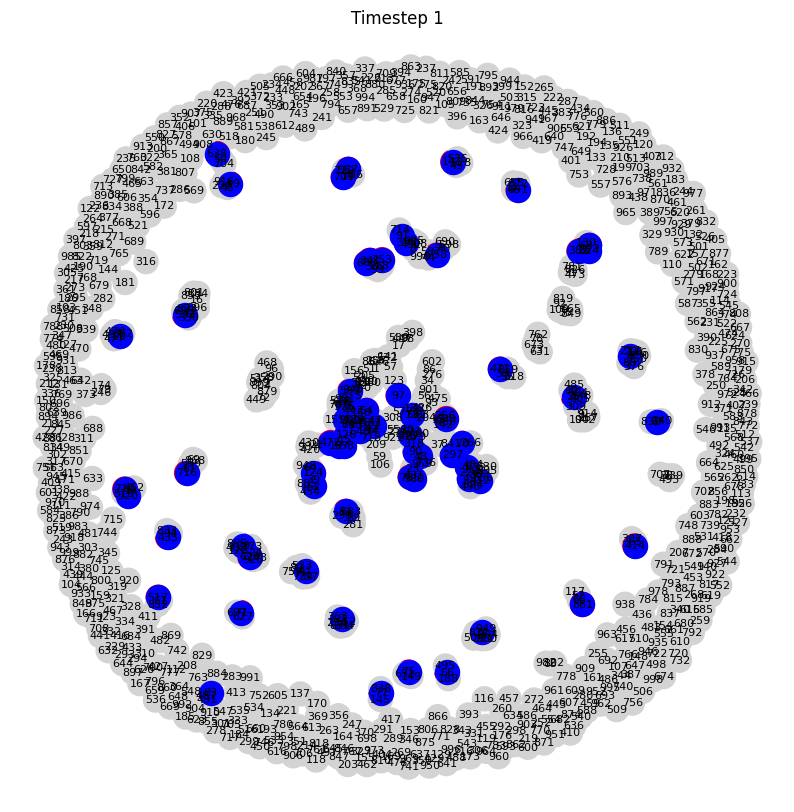

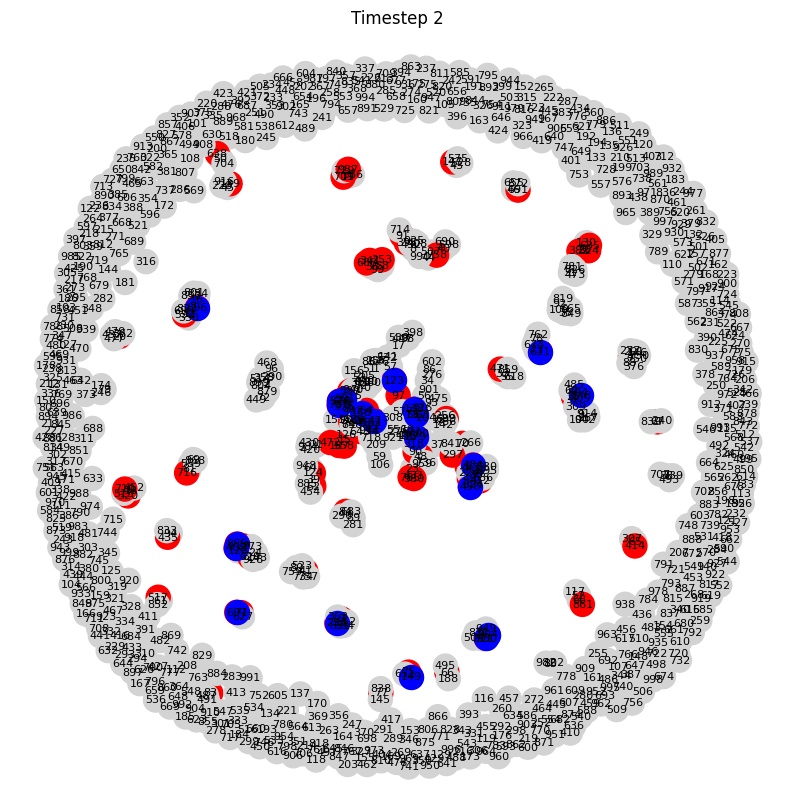

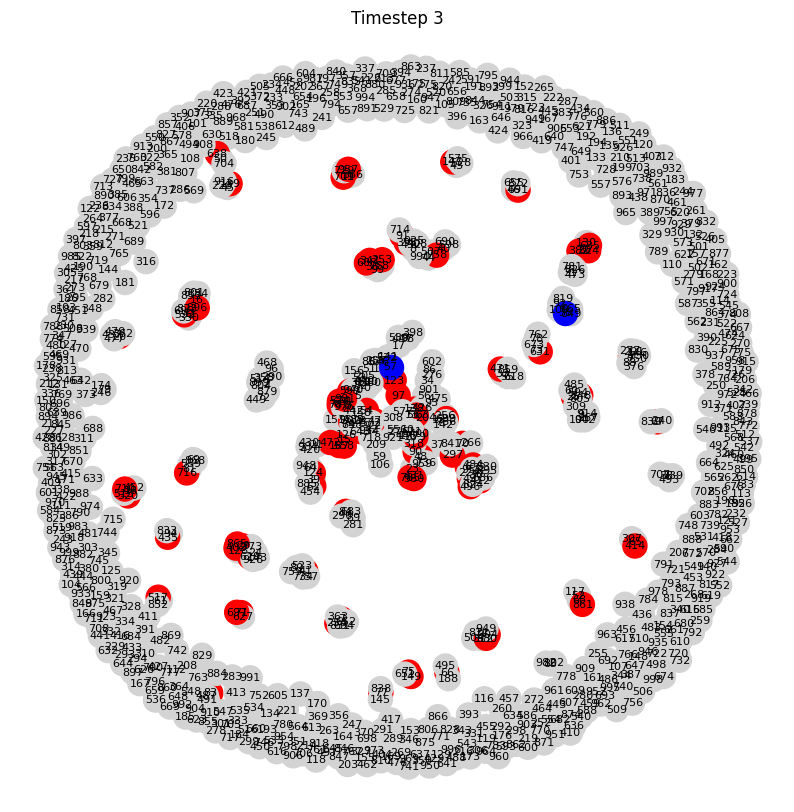

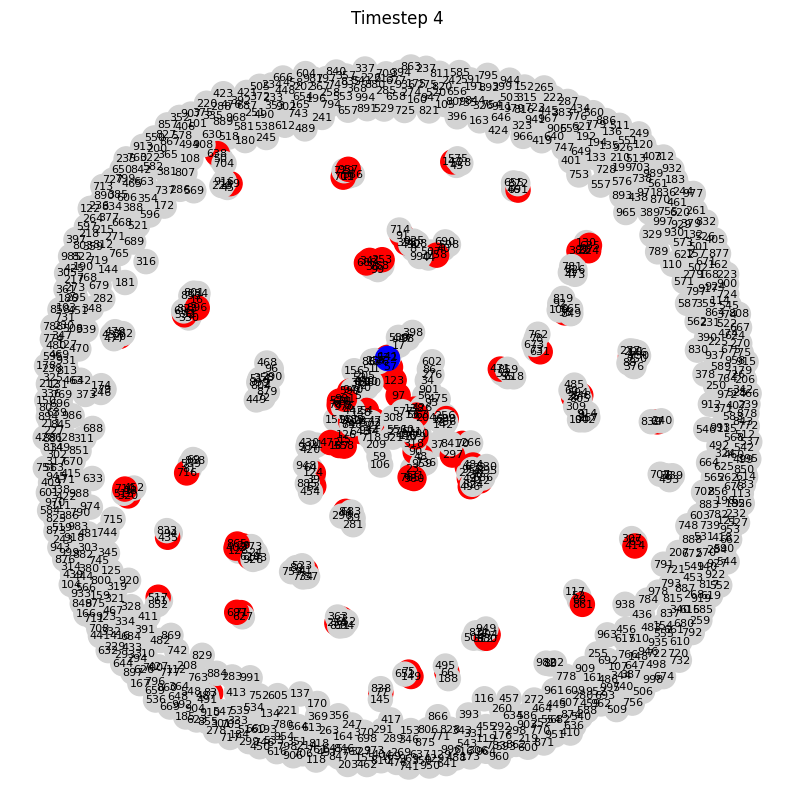

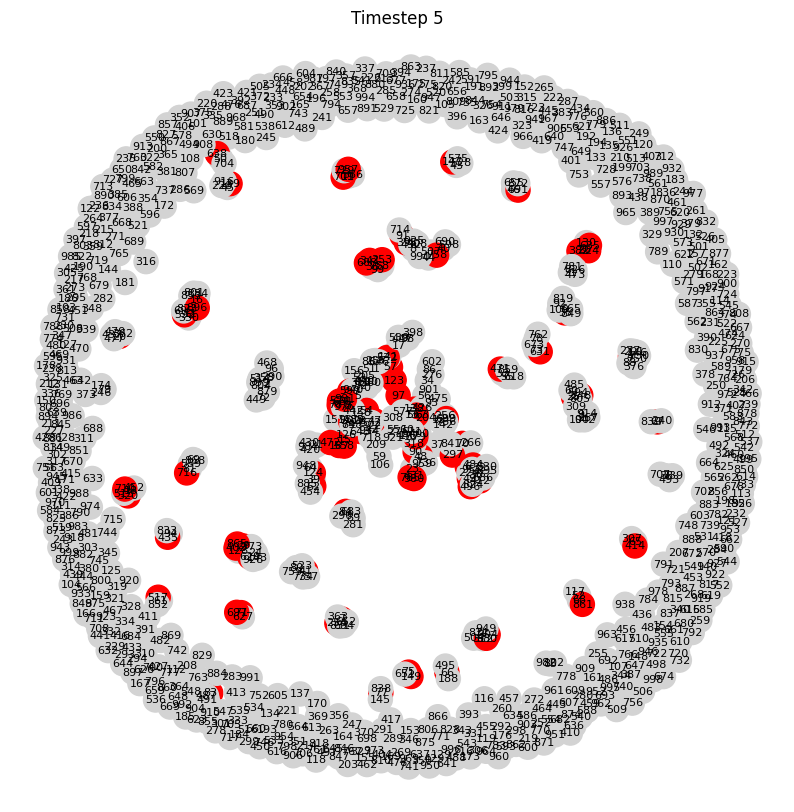

In [8]:
# Adjusted code for a sequence-based display as an alternative to interactive widgets

# Function to visualize spread across sequential timesteps as a static display
def sequential_spread_visualization(G, adoption_timeline):
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency
    
    # Plot each timestep as a static frame
    for t, newly_adopted in enumerate(adoption_timeline):
        plt.figure(figsize=(10, 10))
        plt.title(f"Timestep {t+1}")

        # Determine which nodes have adopted the idea up to this timestep
        adopted_nodes = set(node for step in adoption_timeline[:t+1] for node in step)
        node_colors = ["red" if node in adopted_nodes else "lightgrey" for node in G.nodes()]
        
        # Draw the network, highlighting newly adopted nodes in blue
        nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=300, font_size=8, edge_color="lightgrey")
        nx.draw_networkx_nodes(G, pos, nodelist=newly_adopted, node_color="blue")

        # Display the plot for the current timestep
        plt.show()

# Run the sequential visualization function
sequential_spread_visualization(G, adoption_timeline)



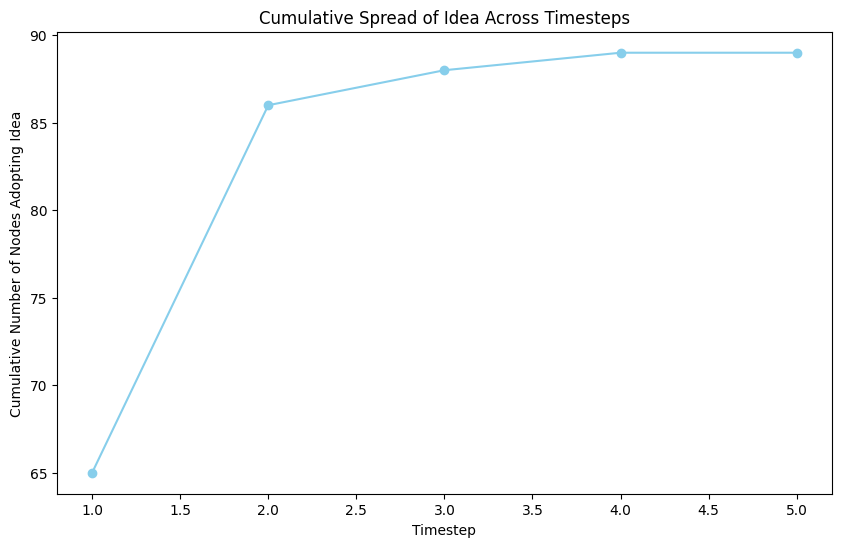

In [12]:
# Correct the timesteps based on the length of the adoption timeline
timesteps = list(range(1, len(adoption_timeline) + 1))

# Calculate cumulative number of nodes adopting the idea at each timestep
cumulative_adopted_per_timestep = [sum(len(new_adoptions) for new_adoptions in adoption_timeline[:t+1]) for t in range(len(adoption_timeline))]

# Plotting the cumulative adoption over time
plt.figure(figsize=(10, 6))
plt.plot(timesteps, cumulative_adopted_per_timestep, marker='o', color="skyblue", linestyle='-')
plt.xlabel("Timestep")
plt.ylabel("Cumulative Number of Nodes Adopting Idea")
plt.title("Cumulative Spread of Idea Across Timesteps")
plt.show()
